In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading data into python environment
data=pd.read_csv('HR salary data.csv')

In [4]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Understanding the dataset

In [5]:
#checking no.of rows and columns
data.shape

(48842, 15)

In [6]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Salary'],
      dtype='object')

In [7]:
#extracting overall informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  Salary           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### 1. Missing value handling

In [8]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
Salary             0
dtype: int64

In [9]:
def unique(data):
    for col in data.columns:
        print ("Unique values in {}.".format(col))
        print(data[col].unique(),"\n")

In [10]:
unique(data)

Unique values in age.
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86] 

Unique values in workclass.
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

Unique values in fnlwgt.
[226802  89814 336951 ... 129912 255835 257302] 

Unique values in education.
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 

Unique values in educational-num.
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1] 

Unique values in marital-status.
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 

Unique values in occupation.
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '

#### Findings

- The dataset contain 48,842 entries with 15 columns representing different features

- There is no missing values

- There is a special character "?" in workclass, Occupation and country


In [11]:
data.isin(['?']).sum(axis=0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
Salary                0
dtype: int64

In [12]:
data['workclass'].mode()

0    Private
dtype: object

In [13]:
data['occupation'].mode()

0    Prof-specialty
dtype: object

In [14]:
data['native-country'].mode()

0    United-States
dtype: object

In [15]:
data['workclass']=data['workclass'].replace('?','Private')
data['occupation']=data['occupation'].replace('?','Prof-speciality')
data['native-country']=data['native-country'].replace('?','United-States')

- Filled the rows with the mode of respective columns

### 2. Checking for duplicates

In [16]:
sum(data.duplicated(data.columns))

52

In [17]:
data=data.drop_duplicates(data.columns, keep='last')
sum(data.duplicated(data.columns))

0

In [18]:
data.shape

(48790, 15)

### 3. Handling Outliers

In [19]:
df=data

<AxesSubplot:xlabel='age'>

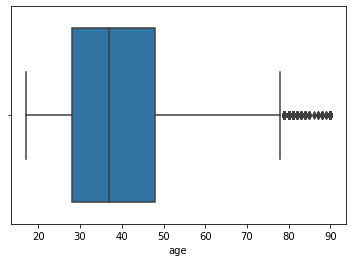

In [20]:
#age
sns.boxplot(data['age'])

In [21]:
q1 = np.percentile(df['age'],25,interpolation='midpoint')
q3 = np.percentile(df['age'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df['age'][(df['age']<low_limit)|(df['age']>high_limit)].index
df.drop(index,inplace=True)

<AxesSubplot:xlabel='age'>

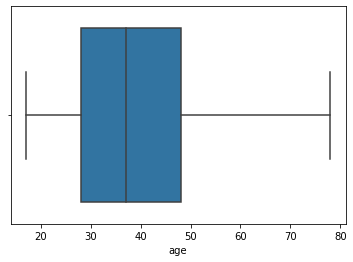

In [22]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='fnlwgt'>

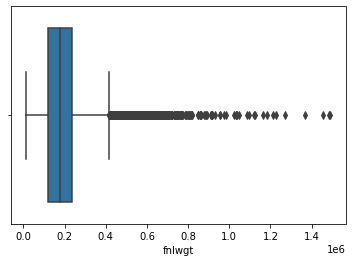

In [23]:
# fnlwgt
sns.boxplot(df['fnlwgt'])

In [24]:
q1 = np.percentile(df['fnlwgt'],25,interpolation='midpoint')
q3 = np.percentile(df['fnlwgt'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df['fnlwgt'][(df['fnlwgt']<low_limit)|(df['fnlwgt']>high_limit)].index
df.drop(index,inplace=True)

<AxesSubplot:xlabel='fnlwgt'>

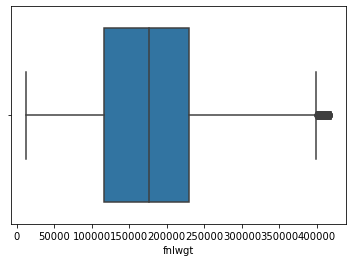

In [25]:
sns.boxplot(df['fnlwgt'])

<AxesSubplot:xlabel='capital-gain'>

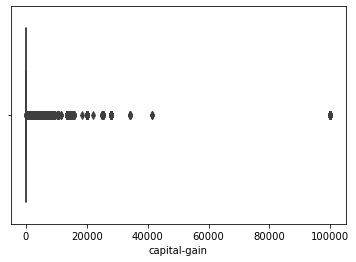

In [26]:
# capital gain
sns.boxplot(df['capital-gain'])

In [27]:
q1 = np.percentile(df['capital-gain'],25,interpolation='midpoint')
q3 = np.percentile(df['capital-gain'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df['capital-gain'][(df['capital-gain']<low_limit)|(df['capital-gain']>high_limit)].index
df.drop(index,inplace=True)

<AxesSubplot:xlabel='capital-gain'>

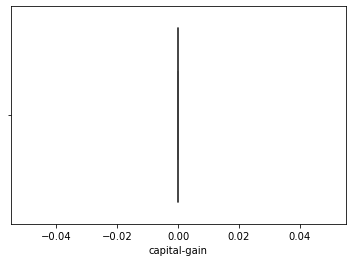

In [28]:
sns.boxplot(df['capital-gain'])

<AxesSubplot:xlabel='capital-loss'>

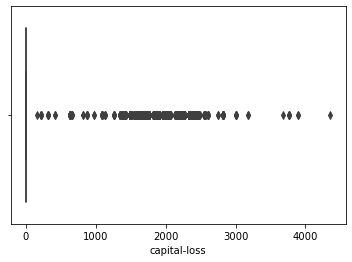

In [29]:
# capital loss
sns.boxplot(df['capital-loss'])

In [30]:
q1 = np.percentile(df['capital-loss'],25,interpolation='midpoint')
q3 = np.percentile(df['capital-loss'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df['capital-loss'][(df['capital-loss']<low_limit)|(df['capital-loss']>high_limit)].index
df.drop(index,inplace=True)

<AxesSubplot:xlabel='capital-loss'>

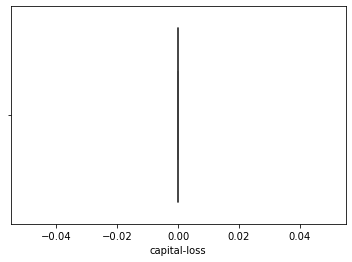

In [31]:
sns.boxplot(df['capital-loss'])

<AxesSubplot:xlabel='hours-per-week'>

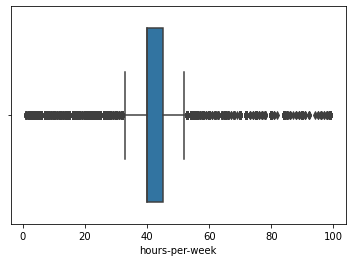

In [32]:
# hours per week
sns.boxplot(df['hours-per-week'])

In [33]:
q1 = np.percentile(df['hours-per-week'],25,interpolation='midpoint')
q3 = np.percentile(df['hours-per-week'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df['hours-per-week'][(df['hours-per-week']<low_limit)|(df['hours-per-week']>high_limit)].index
df.drop(index,inplace=True)

<AxesSubplot:xlabel='hours-per-week'>

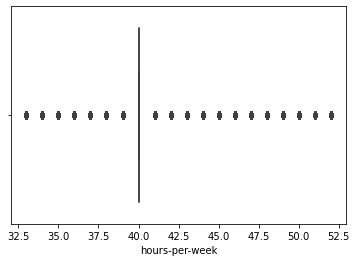

In [34]:
sns.boxplot(df['hours-per-week'])

In [35]:
df.shape

(29613, 15)

### 4. Feature reduction

In [36]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,29613.000000,29613.000000,29613.000000,29613.0,29613.0,29613.00000
mean,38.305879,181241.564752,9.990207,0.0,0.0,41.44342
std,12.221573,87328.368955,2.487733,0.0,0.0,3.94661
min,17.000000,13769.000000,1.000000,0.0,0.0,33.00000
25%,28.000000,117222.000000,9.000000,0.0,0.0,40.00000
50%,37.000000,177083.000000,10.000000,0.0,0.0,40.00000
75%,47.000000,230961.000000,12.000000,0.0,0.0,40.00000
max,78.000000,417668.000000,16.000000,0.0,0.0,52.00000


In [37]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', 'Bachelors',
       'Masters', 'Doctorate', '5th-6th', '10th', 'Assoc-voc', '7th-8th',
       '9th', 'Prof-school', '12th', '1st-4th', 'Preschool'], dtype=object)

In [38]:
df['educational-num'].unique()

array([ 7,  9, 12, 10, 13, 14, 16,  3,  6, 11,  4,  5, 15,  8,  2,  1],
      dtype=int64)

- The features capital gain and capital loss have 75 percentage data as 0
- The education and education num conveys the same information
    - so removing the 3 features

In [39]:
df.drop(['capital-gain','capital-loss','educational-num'], axis = 1,inplace = True)
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,Salary
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
6,29,Private,227026,HS-grad,Never-married,Prof-speciality,Unmarried,Black,Male,40,United-States,<=50K
8,24,Private,369667,Some-college,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K


In [40]:
df.shape

(29613, 12)

- In marital-status column, there are 6 different values which means the same as two values-married or not married. so rearranging them. 

In [41]:
df.replace(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent','Never-married','Separated','Widowed'],
             ['divorced','married','married','married','not married','not married','not married'], inplace = True)

In [42]:
df['marital-status'].value_counts()

married        13864
not married    11218
divorced        4531
Name: marital-status, dtype: int64

### 5. Data Visualization

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>, <AxesSubplot:>]],
      dtype=object)

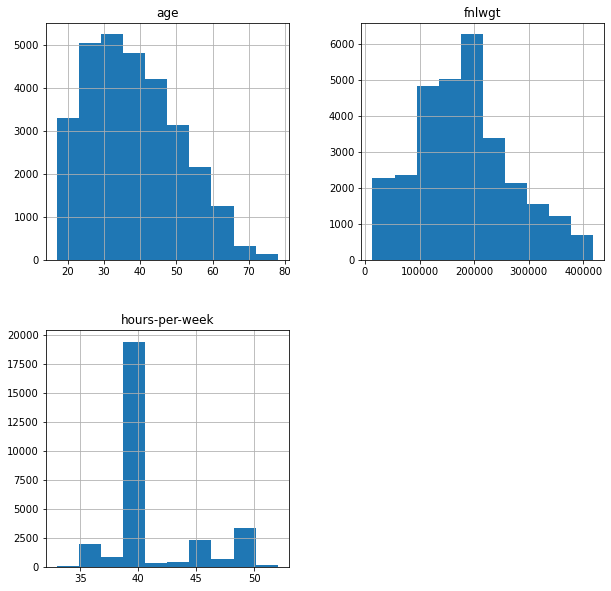

In [43]:
df.hist(figsize=(10,10))

- The min age is 17 and maximum age is 78.
- The most of the working age group lies in between 23 to 36

- The min hours-per-week is 33 and max is 52.
- The highest among hours per week is in between 38 to 41


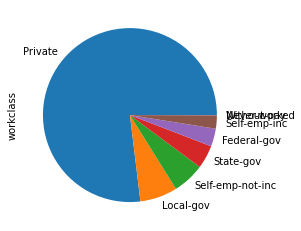

In [44]:
df['workclass'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (8,8)
plt.show()

- In work class, there are more than 75% people are privately employed

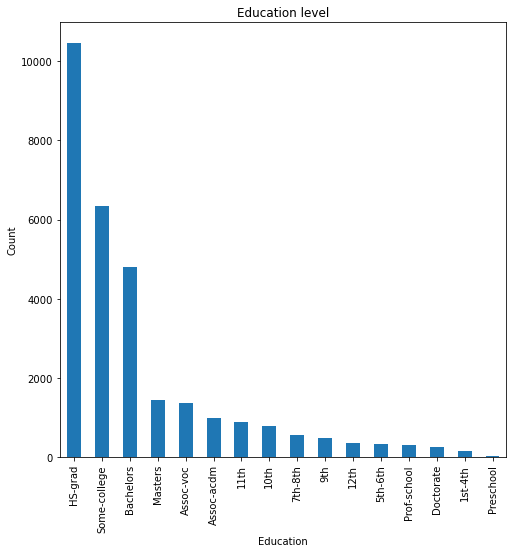

In [45]:
df['education'].value_counts().plot(kind = 'bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (8,8)
plt.title('Education level')
plt.show()

- Here we can clearly see that majority of the people are completed Hs-graduation,or attended college or compleated masters.

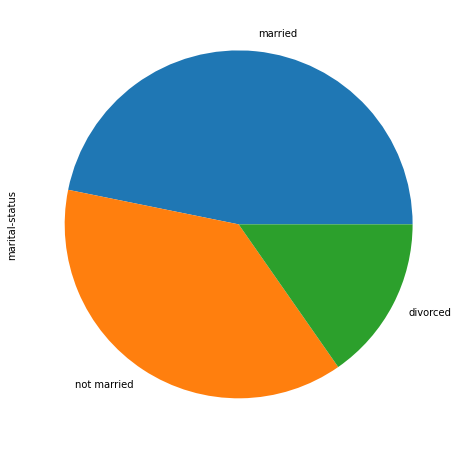

In [46]:
df['marital-status'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (8,8)
plt.show()

- Nearly 45% employees are married and 35% are not married

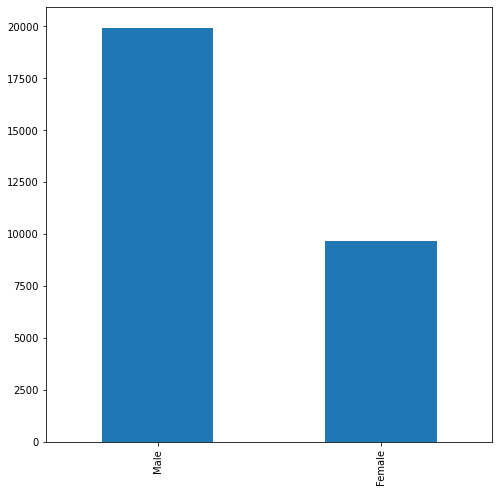

In [47]:
df['gender'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (6,6)
plt.show()

- 75% of employees are male

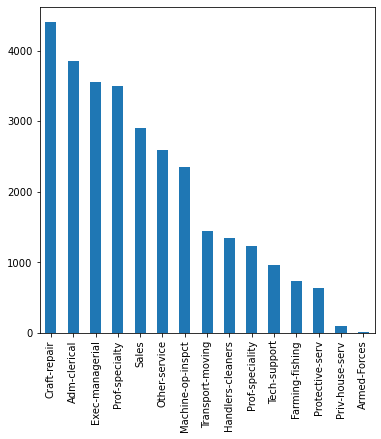

In [48]:
df['occupation'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (8,8)
plt.show()

- Here craft-repair workers are more and armed forces are very few

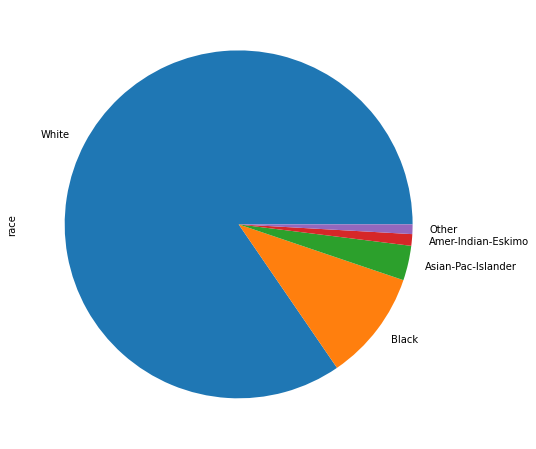

In [49]:
df['race'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (8,8)
plt.show()

- When it comes to race, more than 80% among them are white 

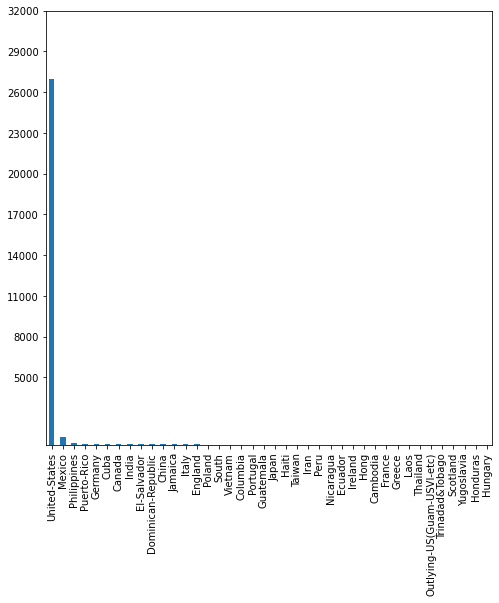

In [50]:
df['native-country'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (8,8)
plt.yticks(np.arange(5000,33000,3000))
plt.show()

- More than 90% of the people belongs to US

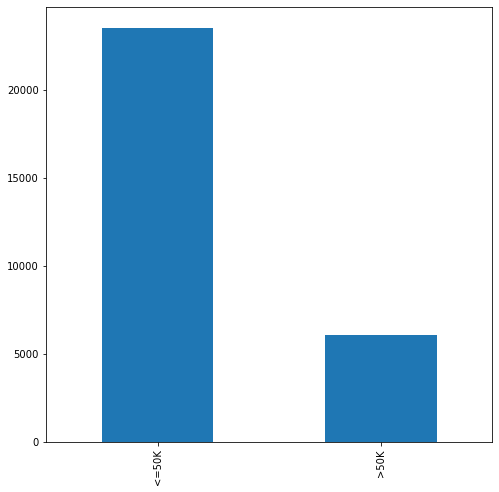

In [51]:
df['Salary'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (8,8)
plt.show()

- Here there are nearly 75% of the people's salary is below 50k

In [52]:
# seperate data into numeric and categorical
numeric_data = df.select_dtypes(include=np.number) 
categorical_data = df.select_dtypes(exclude=np.number)

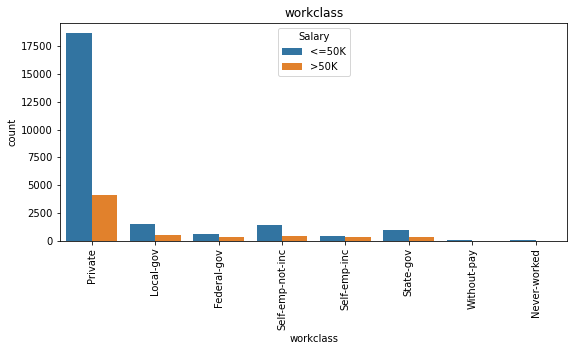

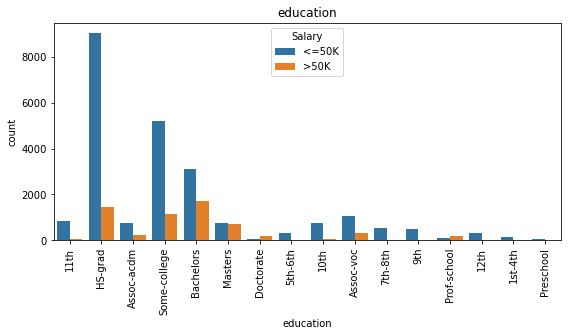

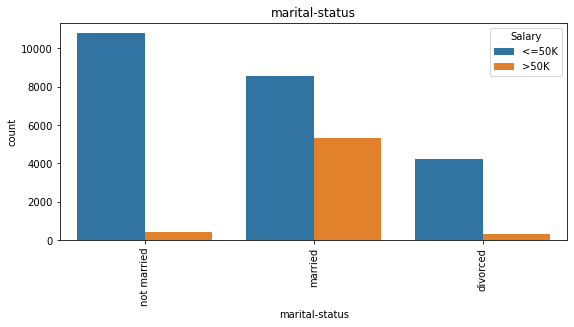

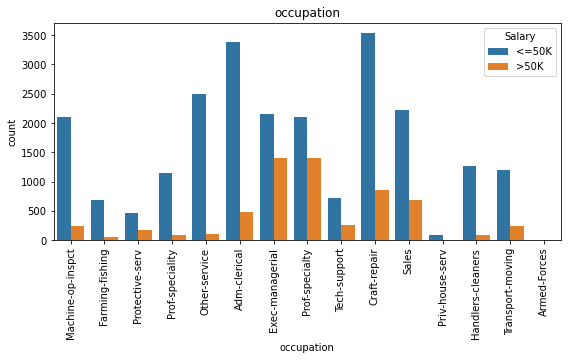

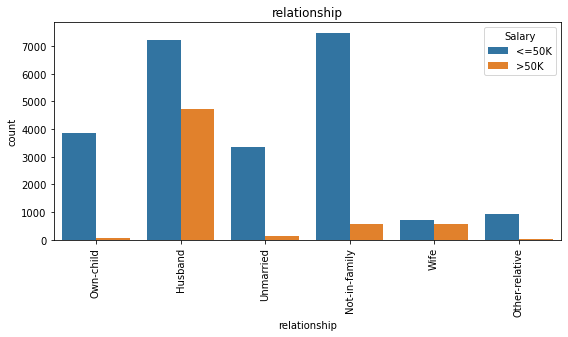

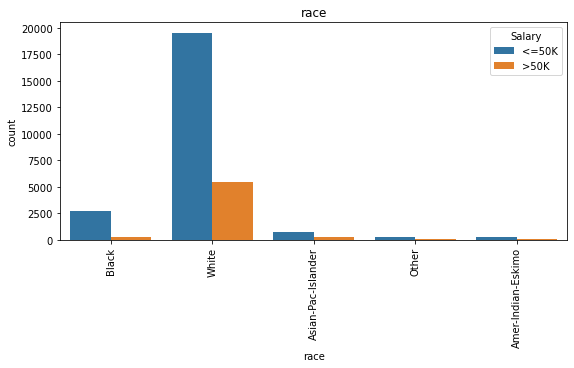

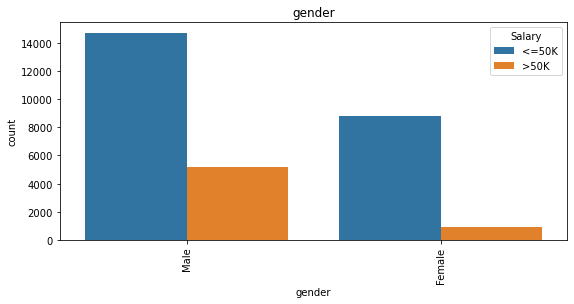

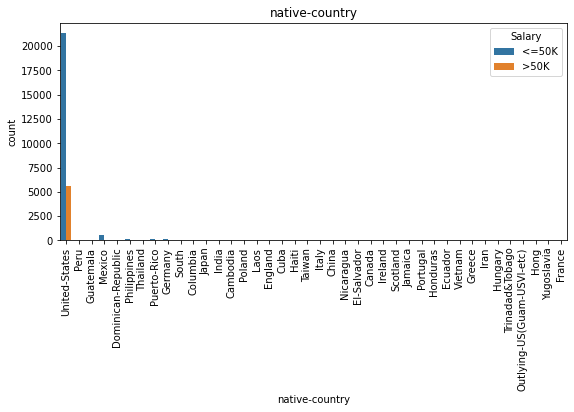

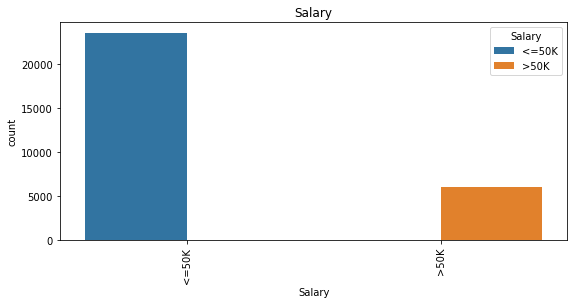

In [53]:
for column in categorical_data:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=categorical_data[column],hue=categorical_data['Salary'],data=categorical_data)
    plt.title(column)    
    plt.xticks(rotation=90)

The people who got the income more than 50k are;
- private employees 
- Bachelors, HS-graduates, college graduates and masters 
- people who are married
- Individuals who's occupation are exec-managerial or having professional speciality.
- Individuals who are husbands
- White peoples
- Male
- people living in US


### 6. Feature Engineering

In [54]:
df.education = df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df.education = df.education.replace('HS-grad', 'high school')
df.education = df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df.education = df.education.replace('Bachelors', 'undergrad')
df.education = df.education.replace('Masters', 'grad')
df.education = df.education.replace('Doctorate', 'doc')

### 7. Encoding

In [55]:
# one hot encoding
one_hot_features = ['marital-status','gender']
df = pd.get_dummies(df, columns=one_hot_features)

In [56]:
df.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,hours-per-week,native-country,Salary,marital-status_divorced,marital-status_married,marital-status_not married,gender_Female,gender_Male
0,25,Private,226802,school,Machine-op-inspct,Own-child,Black,40,United-States,<=50K,0,0,1,0,1
1,38,Private,89814,high school,Farming-fishing,Husband,White,50,United-States,<=50K,0,1,0,0,1
2,28,Local-gov,336951,higher,Protective-serv,Husband,White,40,United-States,>50K,0,1,0,0,1
6,29,Private,227026,high school,Prof-speciality,Unmarried,Black,40,United-States,<=50K,0,0,1,0,1
8,24,Private,369667,higher,Other-service,Unmarried,White,40,United-States,<=50K,0,0,1,1,0


In [57]:
# Label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric 
df['workclass']  = le.fit_transform(df['workclass'])
df['education']  = le.fit_transform(df['education'])
df['occupation']  = le.fit_transform(df['occupation'])
df['relationship']  = le.fit_transform(df['relationship'])
df['race']  = le.fit_transform(df['race'])
df['native-country']  = le.fit_transform(df['native-country'])

In [58]:
df.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,hours-per-week,native-country,Salary,marital-status_divorced,marital-status_married,marital-status_not married,gender_Female,gender_Male
0,25,3,226802,4,6,3,2,40,37,<=50K,0,0,1,0,1
1,38,3,89814,2,4,0,4,50,37,<=50K,0,1,0,0,1
2,28,1,336951,3,11,0,4,40,37,>50K,0,1,0,0,1
6,29,3,227026,2,9,4,2,40,37,<=50K,0,0,1,0,1
8,24,3,369667,3,7,4,4,40,37,<=50K,0,0,1,1,0


### 8. Standardization

In [59]:
x=df.drop(columns=['Salary'],axis=1)
y=df['Salary']
x.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,hours-per-week,native-country,marital-status_divorced,marital-status_married,marital-status_not married,gender_Female,gender_Male
0,25,3,226802,4,6,3,2,40,37,0,0,1,0,1
1,38,3,89814,2,4,0,4,50,37,0,1,0,0,1
2,28,1,336951,3,11,0,4,40,37,0,1,0,0,1
6,29,3,227026,2,9,4,2,40,37,0,0,1,0,1
8,24,3,369667,3,7,4,4,40,37,0,0,1,1,0


In [60]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x =ss.fit_transform(x)
x = pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,2.961300e+04,2.961300e+04,2.961300e+04,2.961300e+04,2.961300e+04,2.961300e+04,2.961300e+04,2.961300e+04,2.961300e+04,2.961300e+04,2.961300e+04,2.961300e+04,2.961300e+04,2.961300e+04
mean,-1.336182e-16,-1.665416e-15,1.616840e-16,-8.000594e-17,-2.680386e-16,6.288602e-16,-3.114496e-16,4.184641e-16,-2.846982e-15,-5.712177e-16,7.365008e-16,-4.227718e-16,-3.762529e-16,3.904395e-16
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.743330e+00,-2.735101e+00,-1.917766e+00,-2.514553e+00,-1.400807e+00,-8.900736e-01,-4.193542e+00,-2.139447e+00,-5.944059e+00,-4.250264e-01,-9.382483e-01,-7.809223e-01,-6.964416e-01,-1.435871e+00
25%,-8.432673e-01,-3.227966e-02,-7.331025e-01,-8.217016e-01,-9.467387e-01,-8.900736e-01,4.066084e-01,-3.657429e-01,2.681377e-01,-4.250264e-01,-9.382483e-01,-7.809223e-01,-6.964416e-01,-1.435871e+00
50%,-1.068521e-01,-3.227966e-02,-4.762066e-02,2.472422e-02,-3.860187e-02,-2.625380e-01,4.066084e-01,-3.657429e-01,2.681377e-01,-4.250264e-01,-9.382483e-01,-7.809223e-01,-6.964416e-01,6.964416e-01
75%,7.113869e-01,-3.227966e-02,5.693485e-01,8.711500e-01,8.695350e-01,9.925332e-01,4.066084e-01,-3.657429e-01,2.681377e-01,-4.250264e-01,1.065816e+00,1.280537e+00,1.435871e+00,6.964416e-01
max,3.247928e+00,3.571482e+00,2.707373e+00,1.717576e+00,1.777672e+00,2.247604e+00,4.066084e-01,2.674893e+00,6.039322e-01,2.352795e+00,1.065816e+00,1.280537e+00,1.435871e+00,6.964416e-01


In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(23690, 14) (5923, 14) (23690,) (5923,)


# 9. Modelling

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score,classification_report

### 9.1 Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
con_lr=confusion_matrix(y_test,y_pred)
print("The confusion matrix of logistic regression is \n",con_lr)

The confusion matrix of logistic regression is 
 [[4471  231]
 [ 944  277]]


In [64]:
print("Accuracy for Logistic Regression is",round(accuracy_score(y_test,y_pred),4))
print("Precision for Logistic Regression is",round(precision_score(y_test,y_pred,average='macro'),4))
print("Recall for Logistic Regression is",round(recall_score(y_test,y_pred,average='macro'),4))
print("F1-Score for Logistic Regression is",round(f1_score(y_test,y_pred,average='macro'),4))

Accuracy for Logistic Regression is 0.8016
Precision for Logistic Regression is 0.6855
Recall for Logistic Regression is 0.5889
F1-Score for Logistic Regression is 0.6021


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.88      4702
        >50K       0.55      0.23      0.32      1221

    accuracy                           0.80      5923
   macro avg       0.69      0.59      0.60      5923
weighted avg       0.77      0.80      0.77      5923



### 9.2 KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(2,18)
for i in neighbors:
  knn_model=KNeighborsClassifier(n_neighbors=i,metric='minkowski')
  knn_model.fit(x_train,y_train)
  y_pred=knn_model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  acc_values.append(acc)

Text(0, 0.5, 'Accuracy values')

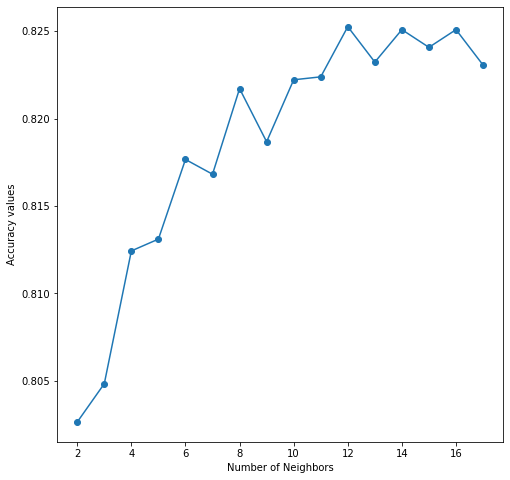

In [67]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy values')

In [68]:
knn_model=KNeighborsClassifier(n_neighbors=7,metric='minkowski')
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
print('Accuracy on training data is:',knn_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.8631067961165049
Accuracy is: 0.8168158028026338
Precision is: 0.8043133012450321
Recall is: 0.8168158028026338
f1 score is: 0.8087041620875535
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      4702
        >50K       0.57      0.45      0.50      1221

    accuracy                           0.82      5923
   macro avg       0.72      0.68      0.70      5923
weighted avg       0.80      0.82      0.81      5923

[[4285  417]
 [ 668  553]]


### 9.3 Support Vector Classifier

In [69]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy on training data is:',svc.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.795778809624314
Accuracy is: 0.7938544656424109
Precision is: 0.6302049126203978
Recall is: 0.7938544656424109
f1 score is: 0.7026265783436454
              precision    recall  f1-score   support

       <=50K       0.79      1.00      0.89      4702
        >50K       0.00      0.00      0.00      1221

    accuracy                           0.79      5923
   macro avg       0.40      0.50      0.44      5923
weighted avg       0.63      0.79      0.70      5923

[[4702    0]
 [1221    0]]


### 9.4 Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print('Accuracy on training data is:',dt_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9998733642887294
Accuracy is: 0.7727502954583826
Precision is: 0.7777434487403
Recall is: 0.7727502954583826
f1 score is: 0.775127808026677
              precision    recall  f1-score   support

       <=50K       0.86      0.85      0.86      4702
        >50K       0.45      0.48      0.46      1221

    accuracy                           0.77      5923
   macro avg       0.66      0.66      0.66      5923
weighted avg       0.78      0.77      0.78      5923

[[3993  709]
 [ 637  584]]


### 9.5 Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
print('Accuracy on training data is:',rf_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9998733642887294
Accuracy is: 0.8277899712983285
Precision is: 0.8165422357238433
Recall is: 0.8277899712983285
f1 score is: 0.8202694392411207
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      4702
        >50K       0.60      0.48      0.54      1221

    accuracy                           0.83      5923
   macro avg       0.74      0.70      0.71      5923
weighted avg       0.82      0.83      0.82      5923

[[4316  386]
 [ 634  587]]


### 9.6 Gradient Boosting

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print('Accuracy on training data is:',rf_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9998733642887294
Accuracy is: 0.8495694749282459
Precision is: 0.8388750748895474
Recall is: 0.8495694749282459
f1 score is: 0.8405350803414381
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4702
        >50K       0.68      0.50      0.58      1221

    accuracy                           0.85      5923
   macro avg       0.78      0.72      0.74      5923
weighted avg       0.84      0.85      0.84      5923

[[4419  283]
 [ 608  613]]


### 9.7 Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
model = GaussianNB()
gnb = model.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print('Accuracy on training data is:',rf_model.score(x_train,y_train))
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy on training data is: 0.9998733642887294
Accuracy is: 0.6999831166638528
Precision is: 0.8092186166292634
Recall is: 0.6999831166638528
f1 score is: 0.7275523849083173
              precision    recall  f1-score   support

       <=50K       0.92      0.68      0.78      4702
        >50K       0.39      0.77      0.51      1221

    accuracy                           0.70      5923
   macro avg       0.65      0.73      0.65      5923
weighted avg       0.81      0.70      0.73      5923

[[3207 1495]
 [ 282  939]]


In [74]:
from tabulate import tabulate
table = [['Model', 'Accuracy'], ['Logistic Regression',80.16], ['KNN',81.68],['SVM',79.38],['Decision tree',77.56],['Random Forest',83.06],['Gradient Boost',84.95]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │      80.16 │
├─────────────────────┼────────────┤
│ KNN                 │      81.68 │
├─────────────────────┼────────────┤
│ SVM                 │      79.38 │
├─────────────────────┼────────────┤
│ Decision tree       │      77.56 │
├─────────────────────┼────────────┤
│ Random Forest       │      83.06 │
├─────────────────────┼────────────┤
│ Gradient Boost      │      84.95 │
╘═════════════════════╧════════════╛


- As seen in the graph, there is a class imbalance problem. Models do not fit well when there is a class imbalance. There are some methods like oversampling, undersampling and mixture. I will do class oversampling using SMOTE(Synthetic Minority Oversampling Technique). It creates new samples along the lines of the existing samples.

### Sampling

In [75]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
target_salary = df.pop('Salary')

In [78]:
target_salary.shape

(29613,)

In [79]:
from collections import Counter

In [80]:
oversample=SMOTE()
x,y=oversample.fit_resample(df,target_salary)
counter=Counter(y)
print(counter)

Counter({'<=50K': 23554, '>50K': 23554})


<BarContainer object of 2 artists>

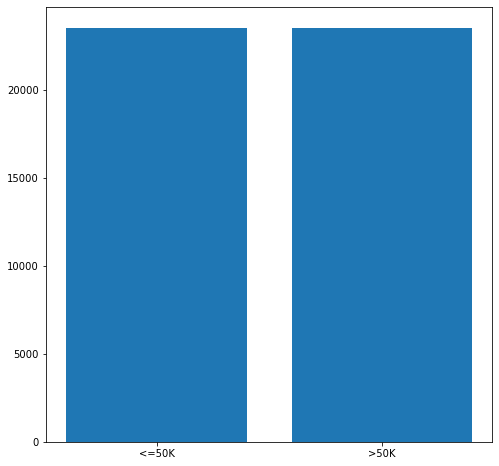

In [81]:
plt.bar(counter.keys(),counter.values())

In [82]:
#Standardisation
scale=StandardScaler()
X=scale.fit_transform(x)

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=24) # 80% 

In [84]:
## Logistic regression
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)
logmodel.score(X_test,Y_test)

0.8174485247293568

In [85]:
## SVM
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
print('Accuracy on training data is:',svc.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.8041713103009075
Accuracy is: 0.8056675864996816
Precision is: 0.8257737242381796
Recall is: 0.8056675864996816
f1 score is: 0.8029358476135804
              precision    recall  f1-score   support

       <=50K       0.91      0.69      0.78      4759
        >50K       0.74      0.93      0.83      4663

    accuracy                           0.81      9422
   macro avg       0.82      0.81      0.80      9422
weighted avg       0.83      0.81      0.80      9422

[[3264 1495]
 [ 336 4327]]


In [86]:
## Decision tree
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
Y_pred=dt_model.predict(X_test)
print('Accuracy on training data is:',svc.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.8041713103009075
Accuracy is: 0.8279558480152833
Precision is: 0.8281309979917431
Recall is: 0.8279558480152833
f1 score is: 0.8279556600293061
              precision    recall  f1-score   support

       <=50K       0.84      0.82      0.83      4759
        >50K       0.82      0.84      0.83      4663

    accuracy                           0.83      9422
   macro avg       0.83      0.83      0.83      9422
weighted avg       0.83      0.83      0.83      9422

[[3900  859]
 [ 762 3901]]


Text(0, 0.5, 'Accuracy values')

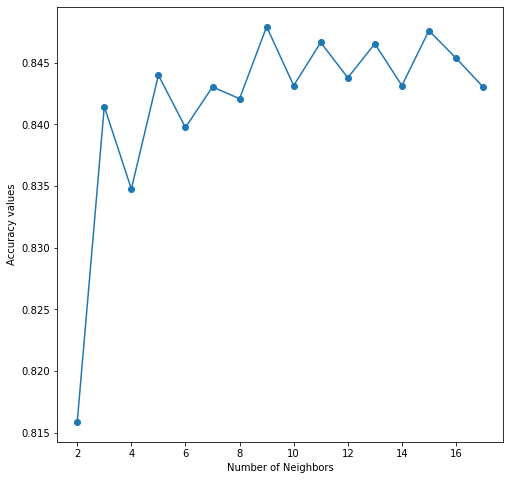

In [87]:
## KNN
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
n_neighbors=np.arange(2,18)
for i in n_neighbors:
  knn_model=KNeighborsClassifier(n_neighbors=i,metric='minkowski')
  knn_model.fit(X_train,Y_train)
  Y_pred=knn_model.predict(X_test)
  acc=accuracy_score(Y_test,Y_pred)
  acc_values.append(acc)
plt.plot(n_neighbors,acc_values,'o-')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy values')

In [88]:
knn_model=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
knn_model.fit(X_train,Y_train)
Y_pred=knn_model.predict(X_test)
print('Accuracy on training data is:',knn_model.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.9139998938597887
Accuracy is: 0.8414349395032902
Precision is: 0.8415904307548988
Recall is: 0.8414349395032902
f1 score is: 0.8414359040321654
              precision    recall  f1-score   support

       <=50K       0.85      0.83      0.84      4759
        >50K       0.83      0.85      0.84      4663

    accuracy                           0.84      9422
   macro avg       0.84      0.84      0.84      9422
weighted avg       0.84      0.84      0.84      9422

[[3967  792]
 [ 702 3961]]


In [89]:
## Random forest
rf_model=RandomForestClassifier()
rf_model.fit(X_train,Y_train)
Y_pred=rf_model.predict(X_test)
print('Accuracy on training data is:',rf_model.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.9998673247359762
Accuracy is: 0.8678624495860752
Precision is: 0.8679884780901791
Recall is: 0.8678624495860752
f1 score is: 0.8678644486076356
              precision    recall  f1-score   support

       <=50K       0.88      0.86      0.87      4759
        >50K       0.86      0.87      0.87      4663

    accuracy                           0.87      9422
   macro avg       0.87      0.87      0.87      9422
weighted avg       0.87      0.87      0.87      9422

[[4097  662]
 [ 583 4080]]


In [90]:
## Gradient boosting
gb = GradientBoostingClassifier()
gb.fit(X_train,Y_train)
Y_pred = gb.predict(X_test)
print('Accuracy on training data is:',rf_model.score(X_train,Y_train))
print('Accuracy is:',accuracy_score(Y_test,Y_pred))
print('Precision is:',precision_score(Y_test,Y_pred,average='weighted'))
print('Recall is:',recall_score(Y_test,Y_pred,average='weighted'))
print('f1 score is:',f1_score(Y_test,Y_pred,average='weighted'))
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

Accuracy on training data is: 0.9998673247359762
Accuracy is: 0.8555508384631713
Precision is: 0.8585968200090419
Recall is: 0.8555508384631713
f1 score is: 0.8553230438206292
              precision    recall  f1-score   support

       <=50K       0.89      0.81      0.85      4759
        >50K       0.82      0.90      0.86      4663

    accuracy                           0.86      9422
   macro avg       0.86      0.86      0.86      9422
weighted avg       0.86      0.86      0.86      9422

[[3866  893]
 [ 468 4195]]


In [91]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.853746550626194

### Model prediction accuracy table

In [92]:
table = [['Model', 'Accuracy'], ['Logistic Regression',81.67], ['KNN',83.84],['Decision tree',82.34],['Random Forest',86.93],['Gradient Boost',85.53],['SVM',80.56]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │      81.67 │
├─────────────────────┼────────────┤
│ KNN                 │      83.84 │
├─────────────────────┼────────────┤
│ Decision tree       │      82.34 │
├─────────────────────┼────────────┤
│ Random Forest       │      86.93 │
├─────────────────────┼────────────┤
│ Gradient Boost      │      85.53 │
├─────────────────────┼────────────┤
│ SVM                 │      80.56 │
╘═════════════════════╧════════════╛


## 10. HyperParameter Tuning

#### Logistic Regression

In [93]:
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid

param_grid = {'C': [1,10,100,1000]}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(X_train, Y_train)
logreg_cv.predict(X_test)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 10}
Best score is 0.8154752887435693


#### SVM

In [94]:
#from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid

#param_grid = {'C': [1,10,100,1000]}
  
# Instantiating logistic regression classifier
#svm_clf = SVC()
  
# Instantiating the GridSearchCV object
#svm_cv = GridSearchCV(svm_clf, param_grid, cv = 5)
  
#svm_cv.fit(X_train, Y_train)
#svm_cv.predict(X_test)

# Print the tuned parameters and score
#print("Tuned SVM Parameters: {}".format(svm_cv.best_params_)) 
#print("Best score is {}".format(svm_cv.best_score_))

#### Gradient Boost

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.15, n_estimators=1750,max_depth=5, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
gb.fit(X_train,Y_train)
y_pred = gb.predict(X_test)
ac_gb=accuracy_score(Y_test,Y_pred)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.81      0.85      4759
        >50K       0.82      0.90      0.86      4663

    accuracy                           0.86      9422
   macro avg       0.86      0.86      0.86      9422
weighted avg       0.86      0.86      0.86      9422



#### Random Forest

In [96]:
rft = RandomForestClassifier(n_estimators=300,max_depth=25,random_state=42,criterion='entropy')
rft.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=300,
                       random_state=42)

In [97]:
y_pred=rft.predict(x_test)
accuracy_score(y_test,y_pred)

0.8711801451966908

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.94      0.89      0.92      4702
        >50K       0.65      0.80      0.72      1221

    accuracy                           0.87      5923
   macro avg       0.80      0.84      0.82      5923
weighted avg       0.88      0.87      0.88      5923



In [102]:
table = [['Model', 'Accuracy'], ['Logistic Regression',81.54],['Random Forest',87.11],['Gradient Boost',86],['SVM',82.9]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │      81.54 │
├─────────────────────┼────────────┤
│ Random Forest       │      87.11 │
├─────────────────────┼────────────┤
│ Gradient Boost      │      86    │
├─────────────────────┼────────────┤
│ SVM                 │      82.9  │
╘═════════════════════╧════════════╛


#### It can be inferred from the table summary that Random Forest model gives best accuracy of 87.11 % while model training.

#### So that we finalized our ML model for predicting the salary using Random Forest Algorithm